<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Customer Clustering with KMeans to Boost Business Strategy


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use the KMeans algorithm to cluster customer data.</p>


## __Table of Contents__
<ol>
  <li>
    <a href="#Objectives">Objectives
    </a>
  </li>
  <li>
    <a href="#Datasets">Datasets
    </a>
  </li>
  <li>
    <a href="#Setup">Setup
    </a>
    <ol>
      <li>
        <a href="#Installing-Required-Libraries">Installing Required Libraries
        </a>
      </li>
      <li>
        <a href="#Importing-Required-Libraries">Importing Required Libraries
        </a>
      </li>
    </ol>
  </li>
  <li>
    <a href="#Examples">Examples
    </a>
    <ol>
      <li>
        <a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe
        </a>
      </li>
      <li>
        <a href="#Task-2---Decide-how-many-clusters-to-create">Task 2 - Decide how many clusters to create
        </a>
      </li>
      <li>
        <a href="#Task-3---Create-a-clustering-model">Task 3 - Create a clustering model
        </a>
      </li>
      <li>
        <a href="#Task-4---Make-Predictions">Task 4 - Make Predictions
        </a>
      </li>        
    </ol>
  </li>

  <li>
    <a href="#Exercises">Exercises
    </a>
  </li>
  <ol>
    <li>
      <a href="#Exercise-1---Load-the-data-in-a-csv-file-into-a-dataframe">Exercise 1 - Load the data in a csv file into a dataframe
      </a>
    </li>
    <li>
      <a href="#Exercise-2---Decide-how-many-clusters-to-create">Exercise 2 - Decide how many clusters to create
      </a>
    </li>
    <li>
      <a href="#Exercise-3---Create-a-clustering-model">Exercise 3 - Create a clustering model
      </a>
    </li>
    <li>
      <a href="#Exercise-4---Make-Predictions">Exercise 4 - Make Predictions
      </a>
    </li>
  </ol>
</ol>














## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Use K Means algorithm to cluter the data.



## Datasets

In this lab you will be using dataset(s):

 - Modified version of Wholesale customers dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/Wholesale+customers 
 - Seeds dataset. Available at https://archive.ics.uci.edu/ml/datasets/seeds
 


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4
# !pip install scikit-learn==0.20.1


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Clustering demo with generated sample data


In [8]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.
# In real life we would use an existing data set.

In [4]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# Print cluster centers
kmeans.cluster_centers_

array([[-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314]])

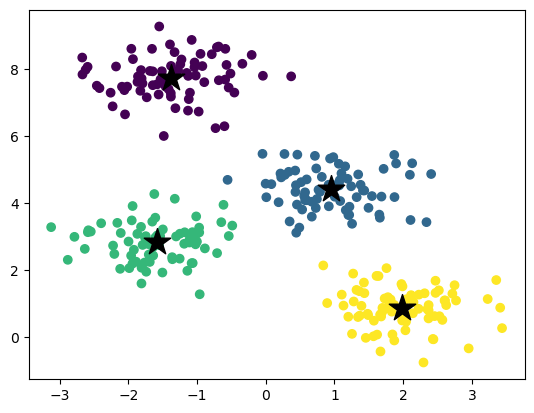

In [6]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

End of Demo


# Examples


## Task 1 - Load the data in a csv file into a dataframe


In [9]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/customers.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [10]:
# show 5 random rows from the dataset
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food
112,19046,2770,2469,8853
389,9385,1530,1422,3019
115,11134,793,2988,2715
111,12579,11114,17569,805
259,53205,4959,7336,3012


Let's find out the number of rows and columns in the dataset:


In [11]:
df.shape

(440, 4)

Let's plot the histograms of all columns


array([[<AxesSubplot:title={'center':'Fresh_Food'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen_Food'}>]], dtype=object)

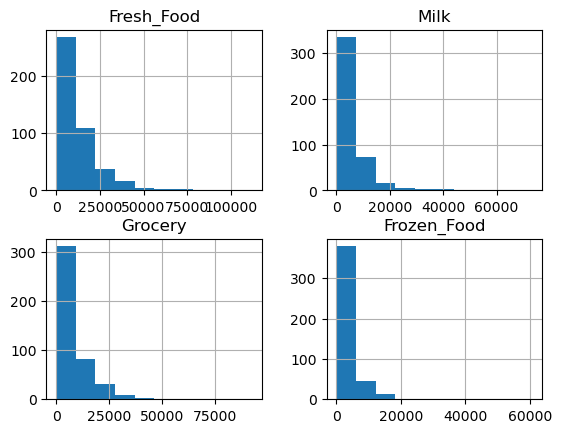

In [12]:
df.hist()

## Task 2 - Decide how many clusters to create


You must tell the KMeans algorithm how many clusters to create out of your data


In [13]:
number_of_clusters = 3

## Task 3 - Create a clustering model


Create a KMeans clustering model


In [14]:
cluster = KMeans(n_clusters = number_of_clusters)

Train the model on the dataset


In [15]:
result = cluster.fit_transform(df)

Your model is now trained. Print cluster centers


In [16]:
cluster.cluster_centers_

array([[ 8234.99093656,  3824.33836858,  5322.42296073,  2568.73716012],
       [35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667],
       [ 8119.69387755, 18812.93877551, 27745.36734694,  2011.42857143]])

## Task 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [17]:
df['cluster_number'] = cluster.predict(df)

In [18]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food,cluster_number
410,6633,2096,4563,1389,0
183,36847,43950,20170,36534,1
231,2344,10678,3828,1439,0
281,12238,7108,6235,1093,0
56,4098,29892,26866,2616,2


Print the cluster numbers and the number of customers in each cluster


In [19]:
df.cluster_number.value_counts()

0    331
1     60
2     49
Name: cluster_number, dtype: int64

# Exercises


### Exercise 1 - Load the data in a csv file into a dataframe


In [20]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/seeds.csv"


Load the seeds dataset available at URL2


In [23]:
df2 = pd.read_csv(URL2)
df2.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Decide how many clusters to create


Cluster the data into 4 clusters


In [24]:
number_of_clusters = 4

<details>
    <summary>Click here for a Hint</summary>
    
set the variable number_of_clusters
</details>


<details>
    <summary>Click here for Solution</summary>

```python
number_of_clusters = 4
```

</details>


### Exercise 3 - Create a clustering model


Create a clustering model and train it using the data in the dataframe


In [25]:
cluster = KMeans(n_clusters = number_of_clusters)
result = cluster.fit_transform(df2)

<details>
    <summary>Click here for a Hint</summary>
    
use the fit_transform of KMeans
</details>


<details>
    <summary>Click here for Solution</summary>

```python
cluster = KMeans(n_clusters = number_of_clusters)
result = cluster.fit_transform(df2)
```

</details>


In [26]:
print(cluster.cluster_centers_)

[[11.89430769 13.25261538  0.84996923  5.22870769  2.86076923  5.08230769
   5.10561538]
 [18.96296296 16.39666667  0.88595185  6.24272222  3.74992593  3.54033333
   6.10077778]
 [15.71909091 14.97659091  0.88038636  5.74518182  3.3985      3.18704773
   5.44838636]
 [13.38744681 13.86468085  0.87411277  5.36661702  3.11334043  2.45285319
   4.99274468]]


### Exercise 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [27]:
df2['cluster_number'] = cluster.predict(df2)

<details>
    <summary>Click here for a Hint</summary>
    
use cluster.predict
</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2['cluster_number'] = cluster.predict(df2)

```

</details>


In [28]:
df2.sample(5)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cluster_number
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0
60,11.42,12.86,0.8683,5.008,2.850,2.700,4.607,3
118,18.89,16.23,0.9008,6.227,3.769,3.639,5.966,1
32,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,3


Print the cluster numbers and the number of seeds in each cluster


In [30]:
print(df2.cluster_number.value_counts())

0    65
1    54
3    47
2    44
Name: cluster_number, dtype: int64


<details>
    <summary>Click here for a Hint</summary>
    
use the value_counts() method on cluster_number column
</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2.cluster_number.value_counts()

```

</details>


Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!-- ## Change Log
-->


<!--
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|
-->
